In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

In [2]:
results = pd.read_csv('../../Data/ResultData/ADAUSDT_7_5_wave_trend_results.csv')

In [3]:
results.head()

,symbol,indicator,start_date,end_date,ob_level,os_level,k,mean,std,skewness,kurtosis,entropy,n_total_partitions,n_partitions,clean_gains
0,ADA/USDT,wave_trend,2020-09-12 00:01:00,2020-09-19 00:00:00,43,-63,0.001,0.094280,0.002346,0.055612,-0.985233,9.217999,68,8,0.157059
1,ADA/USDT,wave_trend,2020-10-03 00:01:00,2020-10-10 00:00:00,43,-63,0.001,0.095097,0.002326,0.409831,-0.210873,9.218010,75,11,4.233419
2,ADA/USDT,wave_trend,2020-09-19 00:01:00,2020-09-26 00:00:00,43,-63,0.002,0.085529,0.005681,0.283234,-1.222078,9.216114,62,2,1.832861
3,ADA/USDT,wave_trend,2020-10-24 00:01:00,2020-10-31 00:00:00,43,-63,0.001,0.102092,0.005335,-0.429036,-1.028970,9.216932,83,36,-13.175106
4,ADA/USDT,wave_trend,2020-10-03 00:01:00,2020-10-10 00:00:00,43,-63,0.002,0.095097,0.002326,0.409831,-0.210873,9.218010,72,12,3.616770


In [4]:
for index, row in results.iterrows():
    print(row['start_date'] + ' - ' + row['end_date'])

2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-10-31 00:01:00 - 2020-11-07 00:00:00
2020-09-26 00:01:00 - 2020-10-03 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-10-31 00:01:00 - 2020-11-07 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-11-14 00:01:00 - 2020-11-21 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-10-17 00:01:00 - 2020-10-24 0

2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-11-14 00:01:00 - 2020-11-21 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-09-26 00:01:00 - 2020-10-03 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-10-10 00:01:00 - 2020-10-17 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-09-19 00:01:00 - 2020-09-26 00:00:00
2020-11-14 00:01:00 - 2020-11-21 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-10-24 00:01:00 - 2020-10-31 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-09-26 00:01:00 - 2020-10-03 00:00:00
2020-10-17 00:01:00 - 2020-10-24 00:00:00
2020-11-14 00:01:00 - 2020-11-21 00:00:00
2020-10-03 00:01:00 - 2020-10-10 00:00:00
2020-11-07 00:01:00 - 2020-11-14 00:00:00
2020-09-26 00:01:00 - 2020-10-03 00:00:00
2020-09-12 00:01:00 - 2020-09-19 00:00:00
2020-10-31 00:01:00 - 2020-11-07 00:00:00
2020-10-10 00:01:00 - 2020-10-17 0

2021-01-30 00:01:00 - 2021-02-05 23:59:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2021-01-23 00:01:00 - 2021-01-30 00:00:00
2020-11-28 00:01:00 - 2020-12-05 00:00:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2020-12-05 00:01:00 - 2020-12-12 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2021-01-02 00:01:00 - 2021-01-09 00:00:00
2021-01-09 00:01:00 - 2021-01-16 00:00:00
2020-11-28 00:01:00 - 2020-12-05 00:00:00
2021-01-02 00:01:00 - 2021-01-09 00:00:00
2021-01-23 00:01:00 - 2021-01-30 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2020-12-05 00:01:00 - 2020-12-12 00:00:00
2021-01-16 00:01:00 - 2021-01-23 0

2021-01-09 00:01:00 - 2021-01-16 00:00:00
2021-01-02 00:01:00 - 2021-01-09 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2021-01-02 00:01:00 - 2021-01-09 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2020-11-28 00:01:00 - 2020-12-05 00:00:00
2021-01-02 00:01:00 - 2021-01-09 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2021-01-30 00:01:00 - 2021-02-05 23:59:00
2020-12-05 00:01:00 - 2020-12-12 00:00:00
2020-12-19 00:01:00 - 2020-12-26 00:00:00
2021-01-30 00:01:00 - 2021-02-05 23:59:00
2020-12-05 00:01:00 - 2020-12-12 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2021-01-02 00:01:00 - 2021-01-09 00:00:00
2020-12-05 00:01:00 - 2020-12-12 00:00:00
2021-01-16 00:01:00 - 2021-01-23 00:00:00
2020-12-12 00:01:00 - 2020-12-19 00:00:00
2020-12-26 00:01:00 - 2021-01-02 00:00:00
2021-01-23 00:01:00 - 2021-01-30 00:00:00
2020-12-12 00:01:00 - 2020-12-19 0

array([[<AxesSubplot:title={'center':'clean_gains'}>]], dtype=object)

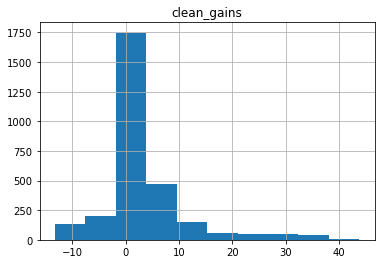

In [5]:
non_zero_results = results[results['clean_gains'] != 0]
non_zero_results.hist(column = 'clean_gains')

For each time frame:
* Build ML models (including hyperparameter tunning)
* Evaluate them
* Perform t-test and select model
* Store optimal values in dataset if the R^2 is greater than 0.8 and clean gains are positive

ML algorithms used:
* Linear Regression
* Ridge Regression
* Lasso Regression
* ElasticNet
* Stochastic Gradient Descent
* Decision Tree Regressor
* Linear Support Vector Regressor
* KNN Regressor
* Gradient Boosting regressor
> MLP Regressor excluded at the moment

# Generate train and test datasets

In [42]:
df = results[results['clean_gains'] != 0]

start_date = df.iloc[0]['start_date']
start_date = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
end_date = start_date + timedelta(days = 7)
df = df[(df['start_date'] >= str(start_date)) & (df['end_date'] < str(end_date))]

df = df.sample(frac=1)
df = df.reset_index(drop=True)

X = df[['ob_level', 'os_level', 'k']].to_numpy()
y = df['clean_gains'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
k_test = []
for x in X_test:
    k_test.append(x[2])

# Linear regression

In [47]:
linear = LinearRegression()

linear.fit(X_train, y_train)

linear_y_pred = linear.predict(X_test)

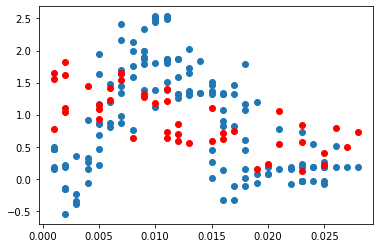

In [48]:
plt.scatter(df['k'], y)

plt.scatter(k_test, linear_y_pred, color = 'r')

In [49]:
linear_R2 = metrics.r2_score(y_test, linear_y_pred)
print(linear_R2)

0.06366971870522031


# Ridge regression

In [10]:
ridge = Ridge(alpha = 0.00001) # TODO: tunning

ridge.fit(X_train, y_train)

ridge_y_pred = ridge.predict(X_test)

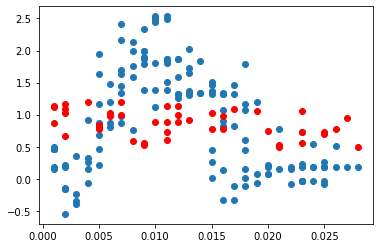

In [50]:
plt.scatter(df['k'], y)

plt.scatter(k_test, ridge_y_pred, color = 'r')

In [51]:
ridge_R2 = metrics.r2_score(y_test, ridge_y_pred)
print(ridge_R2)

-0.08256028635016288


# Lasso regression

In [52]:
lasso = Lasso(alpha = 0.00001) # TODO: tunning

lasso.fit(X_train, y_train)

lasso_y_pred = lasso.predict(X_test)

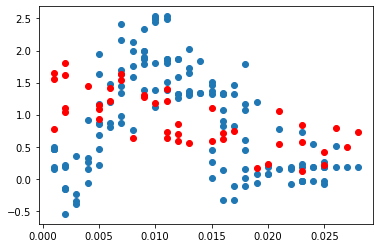

In [53]:
plt.scatter(df['k'], y)

plt.scatter(k_test, lasso_y_pred, color = 'r')

In [54]:
lasso_R2 = metrics.r2_score(y_test, lasso_y_pred)
print(lasso_R2)

0.06439544829780652


# ElasticNet

In [16]:
elastic_net = ElasticNet(alpha=0.00001, l1_ratio=0.1)

elastic_net.fit(X_train, y_train)

elastic_net_y_pred = elastic_net.predict(X_test)

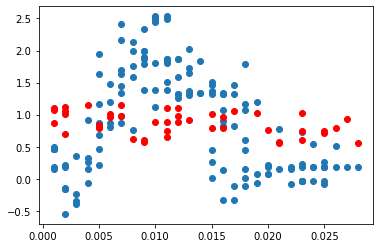

In [55]:
plt.scatter(df['k'], y)

plt.scatter(k_test, elastic_net_y_pred, color = 'r')

In [56]:
elastic_net_R2 = metrics.r2_score(y_test, elastic_net_y_pred)
print(elastic_net_R2)

-0.06249837394807467


# Stochastic Gradient Descent

In [19]:
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

sgd.fit(X_train, y_train)

sgd_y_pred = sgd.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


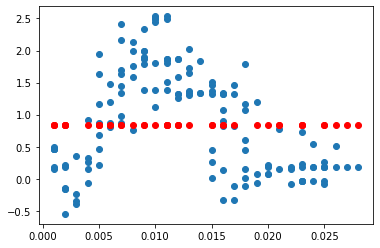

In [57]:
plt.scatter(df['k'], y)

plt.scatter(k_test, sgd_y_pred, color = 'r')

In [58]:
sgd_R2 = metrics.r2_score(y_test, sgd_y_pred)
print(sgd_R2)

-0.0066805683901387525


# DecisionTreeRegressor

In [60]:
dt = DecisionTreeRegressor(random_state=0)

dt.fit(X_train, y_train)

dt_y_pred = dt.predict(X_test)

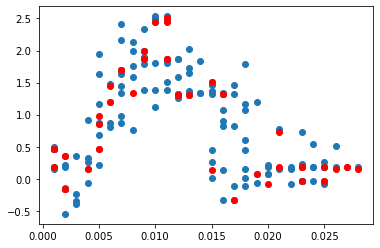

In [61]:
plt.scatter(df['k'], y)

plt.scatter(k_test, dt_y_pred, color = 'r')

In [62]:
dt_R2 = metrics.r2_score(y_test, dt_y_pred)
print(dt_R2)

0.821581565357218


# Linear Support Vector Regressor

In [25]:
svr = LinearSVR(random_state=0, tol=1e-5)

svr.fit(X_train, y_train)

svr_y_pred = svr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


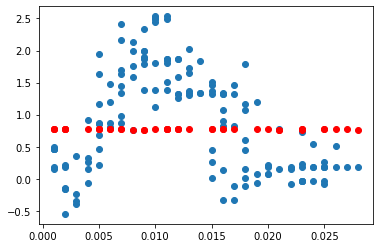

In [63]:
plt.scatter(df['k'], y)

plt.scatter(k_test, svr_y_pred, color = 'r')

In [64]:
svr_R2 = metrics.r2_score(y_test, svr_y_pred)
print(svr_R2)

-0.028804754955343626


# KNN Regressor

In [119]:
param_grid = {'n_neighbors': range(2, 30)}

model = KNeighborsRegressor()

clf = HalvingRandomSearchCV(model, param_grid, scoring='r2')

clf.fit(X_train, y_train)

knn = clf.best_estimator_

knn_y_pred = knn.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 208, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 683, 

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan -1.90278949         nan
 -1.6820606          nan  0.05798617  0.04965474]
  category=UserWarning
E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan        nan 0.04366205
        nan        nan        nan        nan 0.01979594        nan
 0.17791349        nan 0.16997802 0.16443461]
  category=UserWarning


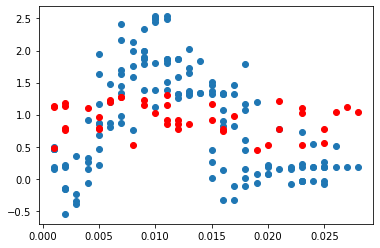

In [120]:
plt.scatter(df['k'], y)

plt.scatter(k_test, knn_y_pred, color = 'r')

In [121]:
knn_R2 = metrics.r2_score(y_test, knn_y_pred)
print(knn_R2)

0.14358825621410198


# Gradient Boosting Regressor

In [122]:
param_grid = {'random_state': range(2, 30)}

model = KNeighborsRegressor()

clf = HalvingRandomSearchCV(model, param_grid, scoring='r2')

clf.fit(X_train, y_train)

bgr = clf.best_estimator_

gbr_y_pred = gbr.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 208, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 683, 

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
 -0.57071336 -0.08175515  0.0435034   0.04684281]
  category=UserWarning
E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the train scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.50738971        nan        nan        nan
 0.59208988 0.16904291 0.17826416 0.18135038]
  category=UserWarning


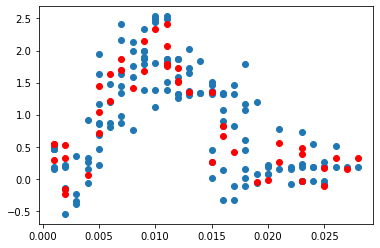

In [123]:
plt.scatter(df['k'], y)

plt.scatter(k_test, gbr_y_pred, color = 'r')

In [124]:
gbr_R2 = metrics.r2_score(y_test, gbr_y_pred)
print(gbr_R2)

0.9293144437241697


# KNN hyperparameter tunning

In [89]:
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]}

model = KNeighborsRegressor()

clf = HalvingRandomSearchCV(model, param_grid, scoring='r2')
clf.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:289: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
E:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
E:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
E:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
E:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.w

E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:687: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "E:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "E:\Anaconda\lib\site-packages\sklearn\metrics\_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_regression.py", line 208, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "E:\Anaconda\lib\site-packages\sklearn\neighbors\_base.py", line 683, 

HalvingRandomSearchCV(estimator=KNeighborsRegressor(),
                      param_distributions={'n_neighbors': [2, 3, 4, 5, 6, 7, 8,
                                                           9]},
                      refit=<function _refit_callable at 0x000002AC38546BF8>,
                      scoring='r2')

In [90]:
print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'n_neighbors': 8}
